IMPORTING DATA 

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression


df = pd.read_csv('data.csv')


VIEWING DATA 

In [ ]:
df.head(10) 

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17
5,46,2015-08-14 18:00:18-07:00,64818,4,0,0,72.15,0,0,8,18
6,43,2015-08-14 18:20:08-07:00,66008,4,0,0,72.15,0,0,8,18
7,53,2015-08-14 18:30:09-07:00,66609,4,0,0,72.15,0,0,8,18
8,54,2015-08-14 18:40:14-07:00,67214,4,0,0,72.15,0,0,8,18
9,43,2015-08-14 18:50:15-07:00,67815,4,0,0,72.15,0,0,8,18


In [363]:
df.tail(10)

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
62174,19,2017-03-18 17:52:12-07:00,64332,5,1,0,61.52,0,1,3,17
62175,15,2017-03-18 18:02:15-07:00,64935,5,1,0,61.07,0,1,3,18
62176,17,2017-03-18 18:12:19-07:00,65539,5,1,0,61.07,0,1,3,18
62177,18,2017-03-18 18:22:21-07:00,66141,5,1,0,61.07,0,1,3,18
62178,21,2017-03-18 18:32:25-07:00,66745,5,1,0,61.07,0,1,3,18
62179,23,2017-03-18 18:42:28-07:00,67348,5,1,0,61.07,0,1,3,18
62180,21,2017-03-18 18:52:35-07:00,67955,5,1,0,61.07,0,1,3,18
62181,25,2017-03-18 19:02:40-07:00,68560,5,1,0,56.71,0,1,3,19
62182,18,2017-03-18 19:12:47-07:00,69167,5,1,0,56.71,0,1,3,19
62183,23,2017-03-18 19:22:51-07:00,69771,5,1,0,56.71,0,1,3,19


In [364]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number_people         62184 non-null  int64  
 1   date                  62184 non-null  object 
 2   timestamp             62184 non-null  int64  
 3   day_of_week           62184 non-null  int64  
 4   is_weekend            62184 non-null  int64  
 5   is_holiday            62184 non-null  int64  
 6   temperature           62184 non-null  float64
 7   is_start_of_semester  62184 non-null  int64  
 8   is_during_semester    62184 non-null  int64  
 9   month                 62184 non-null  int64  
 10  hour                  62184 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 5.2+ MB


REMOVING UNNEEDED COLUMNS  

In [365]:
df = df[["number_people","date","day_of_week", "is_weekend", "is_holiday", "month", "hour"]]
df

,number_people,date,day_of_week,is_weekend,is_holiday,month,hour
0,37,2015-08-14 17:00:11-07:00,4,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,4,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,4,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,4,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,4,0,0,8,17
...,...,...,...,...,...,...,...
62179,23,2017-03-18 18:42:28-07:00,5,1,0,3,18
62180,21,2017-03-18 18:52:35-07:00,5,1,0,3,18
62181,25,2017-03-18 19:02:40-07:00,5,1,0,3,19
62182,18,2017-03-18 19:12:47-07:00,5,1,0,3,19


GRAPHS TO SEE CORRELATION

In [366]:
#df.corr()["number_people"]

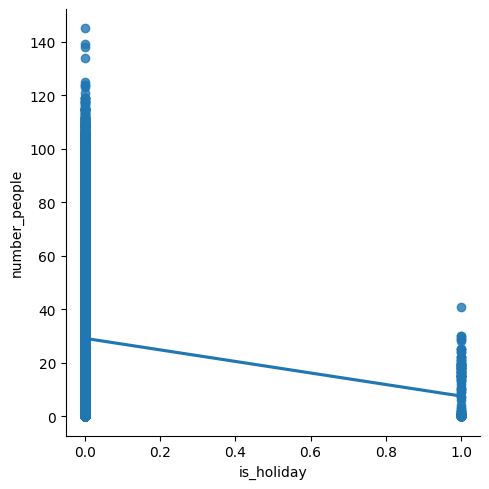

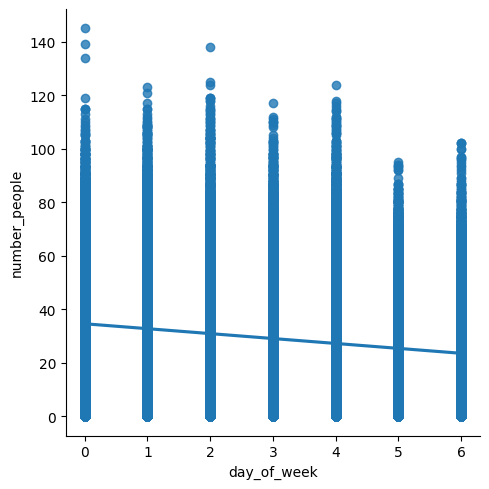

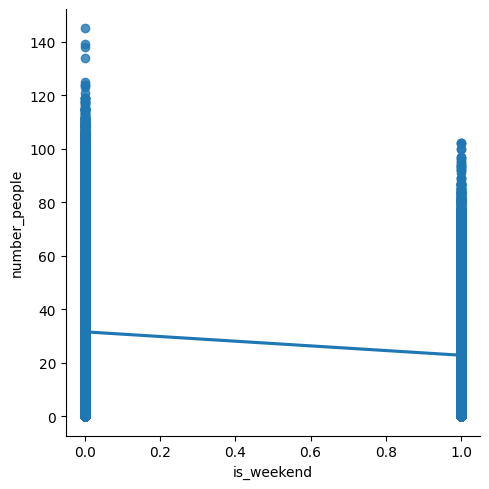

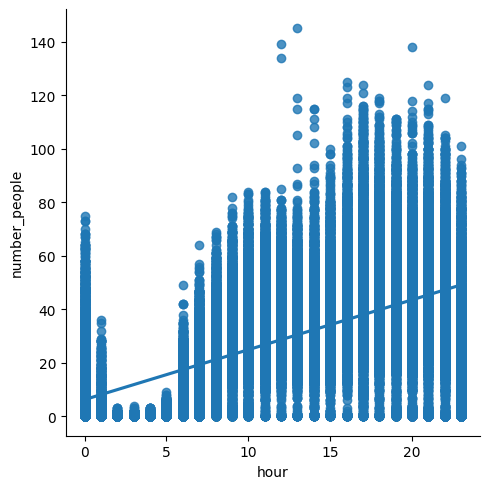

In [367]:
sns.lmplot(x = "is_holiday", y = "number_people", data = df, fit_reg = True, ci = None)
sns.lmplot(y = "number_people", x = "day_of_week", data = df, fit_reg = True, ci = None)
sns.lmplot(x = "is_weekend", y = "number_people", data = df, fit_reg = True, ci = None)
sns.lmplot(x = "hour", y = "number_people", data = df, fit_reg = True, ci = None)



<Axes: ylabel='Frequency'>

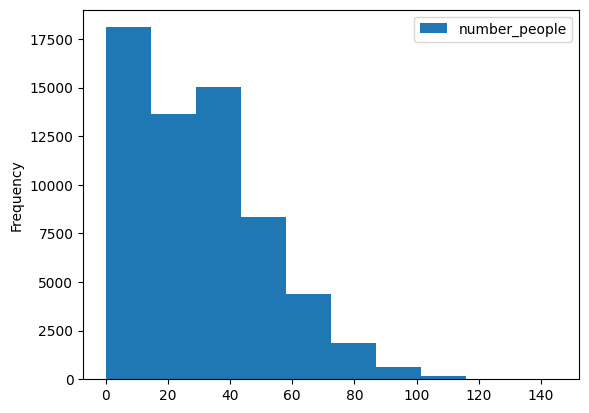

In [368]:
df.plot.hist(y="number_people")

<function matplotlib.pyplot.show(close=None, block=None)>

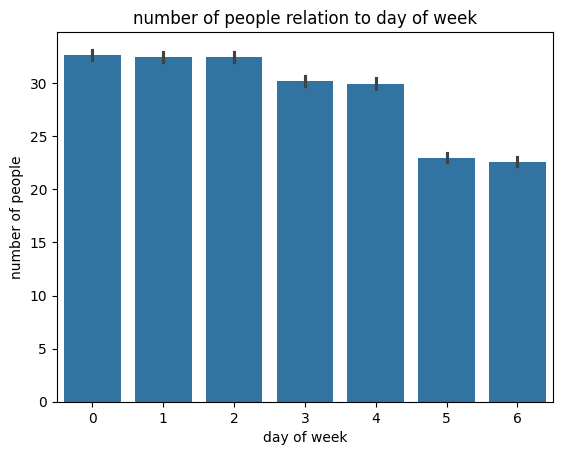

In [369]:
sns.barplot(y = "number_people", x = "day_of_week",data = df)
plt.title("number of people relation to day of week")
plt.xlabel("day of week")
plt.ylabel("number of people")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

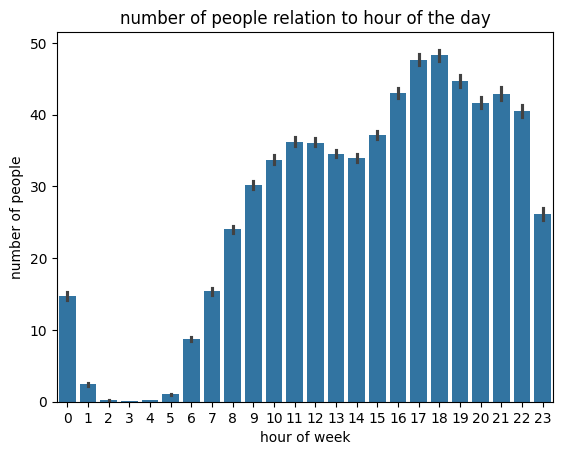

In [370]:
sns.barplot(y = "number_people", x = "hour",data = df)
plt.title("number of people relation to hour of the day")
plt.xlabel("hour of week")
plt.ylabel("number of people")

plt.show

DATA CLEANING 

In [371]:
df[df.isnull().any(axis=1)]

,number_people,date,day_of_week,is_weekend,is_holiday,month,hour


DATA SPLIT

In [372]:
def preprocess_inputs(df):
    df = df.copy()
    
    # Extract date features
    df['date'] = pd.to_datetime(df['date'])
    df['month'] = df['date'].apply(lambda x: x.month)
    df['day'] = df['date'].apply(lambda x: x.day)
    df['hour'] = df['date'].apply(lambda x: x.hour)
    df['minute'] = df['date'].apply(lambda x: x.minute)
    df = df.drop('date', axis=1)
    
    # Split df into X and y
    y = df['number_people']
    X = df.drop('number_people', axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test  = preprocess_inputs(df)

In [373]:
X_train

,day_of_week,is_weekend,is_holiday,month,hour,day,minute
23552,-0.989840,-0.623864,-0.049641,-1.000469,-0.926864,-0.436112,-1.668369
3026,-1.491776,-0.623864,-0.049641,0.452734,-0.331144,-0.209158,1.227967
16668,-1.491776,-0.623864,-0.049641,-1.581751,0.860295,-1.684358,-0.509835
13838,1.519844,1.602914,-0.049641,-1.872391,0.711366,-1.457404,1.227967
6459,-1.491776,-0.623864,-0.049641,0.743375,1.307085,0.358226,1.227967
...,...,...,...,...,...,...,...
50057,1.017907,1.602914,-0.049641,0.743375,-1.373653,1.492995,0.996260
32511,0.515970,-0.623864,-0.049641,-0.419188,1.307085,0.925610,0.069433
5192,-0.989840,-0.623864,-0.049641,0.743375,1.604945,-1.116974,-0.509835
12172,0.014034,-0.623864,-0.049641,1.324656,1.307085,0.131272,-0.509835


In [374]:
y_train

23552     2
3026     46
16668    87
13838    31
6459     88
         ..
50057     0
32511    23
5192     88
12172    30
33003    23
Name: number_people, Length: 43528, dtype: int64

TRAINING

In [375]:
models = {
    "Linear Regression (Ridge)": Ridge(),
    "           Neural Network": MLPRegressor(),
    "            Random Forest": RandomForestRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

Linear Regression (Ridge) trained.
           Neural Network trained.
            Random Forest trained.


RESULTS

In [376]:
def get_rmse(y_test, y_pred):
    rmse = np.sqrt(np.mean((y_test - y_pred)**2))
    return rmse

def get_r2(y_test, y_pred):
    r2 = 1 - (np.sum((y_test - y_pred)**2) / np.sum((y_test - y_test.mean())**2))
    return r2

In [377]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    rmse = get_rmse(y_test, y_pred)
    print(name + " RMSE: {:.2f}".format(rmse))

Linear Regression (Ridge) RMSE: 18.46
           Neural Network RMSE: 13.56
            Random Forest RMSE: 7.04


In [378]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    r2 = get_r2(y_test, y_pred)
    print(name + " R^2: {:.5f}".format(r2))

Linear Regression (Ridge) R^2: 0.34510
           Neural Network R^2: 0.64646
            Random Forest R^2: 0.90468
